In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon = pd.read_csv('./amazon_cells_labelled.txt', sep='\t', header=None)
imdb = pd.read_csv('./imdb_labelled.txt', sep='\t', header=None)
yelp = pd.read_csv('./yelp_labelled.txt', sep='\t', header=None)

In [3]:
np.random.seed(400)

In [4]:
import nltk
import pandas as pd
import numpy as np
import string
from collections import defaultdict

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

In [5]:
from wordcloud import WordCloud, STOPWORDS 

In [6]:
def draw_wordcloud(text_data, stopwords=None):
    words = ' '
    for line in text_data:
        for word in line:
            words = words + word + ' '

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(words) 

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [7]:
def lower_tokenize(text_data):
    text_data = [entry.lower() for entry in text_data]
    text_data = [word_tokenize(entry) for entry in text_data]
    return text_data

# Wstępna analiza

In [8]:
amazon

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


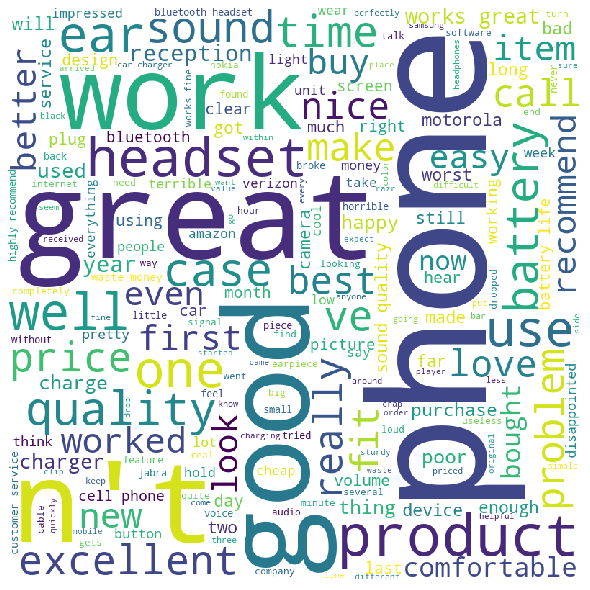

In [9]:
amazon_text = lower_tokenize(amazon[0])
draw_wordcloud(amazon_text)

In [10]:
imdb

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


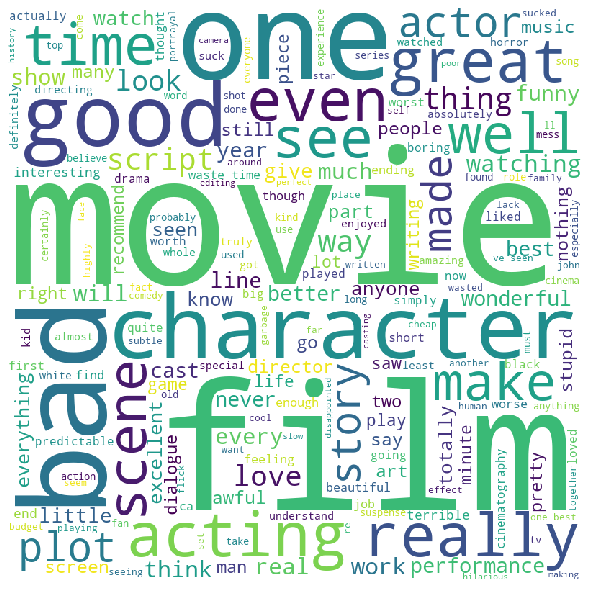

In [11]:
imdb_text = lower_tokenize(imdb[0])
draw_wordcloud(imdb_text, stopwords=STOPWORDS.add('n\'t'))

In [12]:
yelp

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


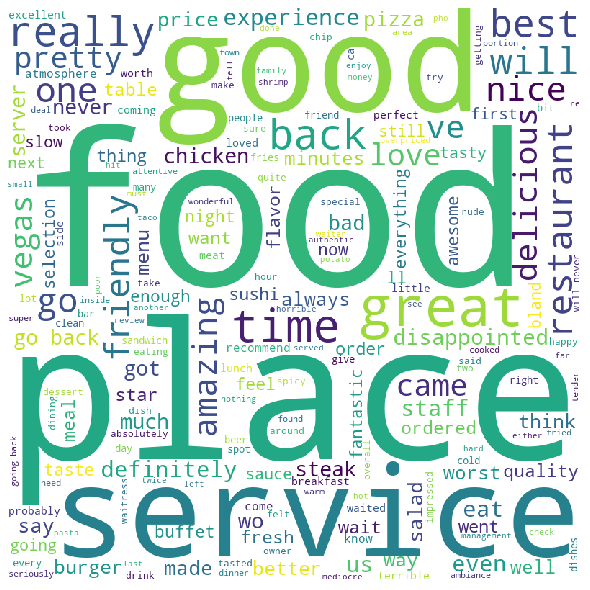

In [13]:
yelp_text = lower_tokenize(yelp[0])
draw_wordcloud(yelp_text)#, stopwords=STOPWORDS.add('n\'t'))

In [14]:
print(np.count_nonzero(amazon[1])/amazon.shape[0])
print(np.count_nonzero(imdb[1])/imdb.shape[0])
print(np.count_nonzero(yelp[1])/yelp.shape[0])

0.5
0.516042780748663
0.5


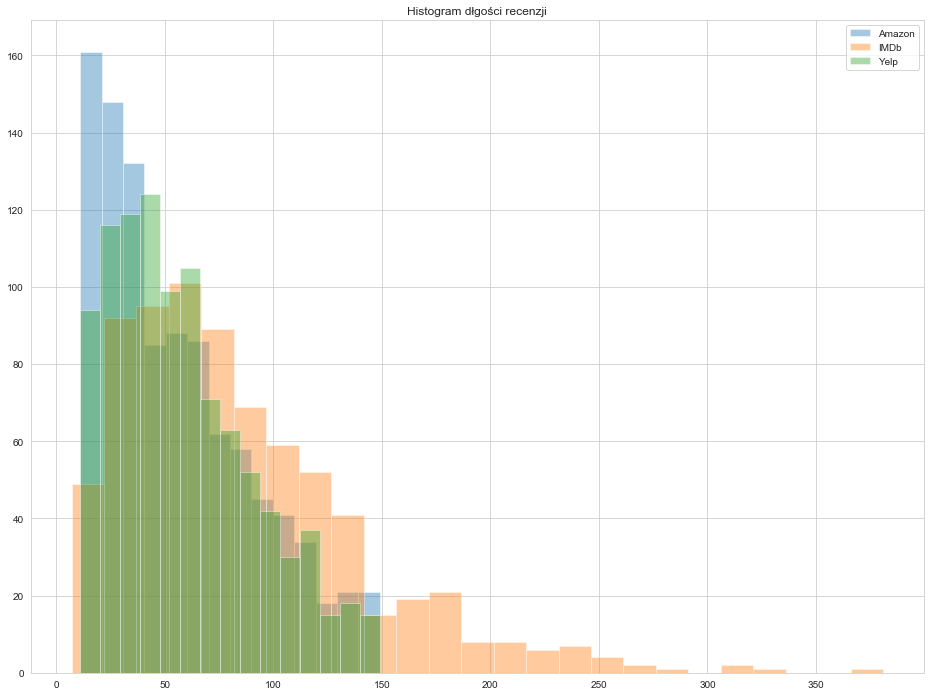

In [15]:
plt.figure(figsize=(16,12))

sns.set_style("whitegrid")
am_lens = list(map(len, amazon[0]))
sns.distplot(am_lens, kde=False)

im_lens = [ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i < 400]
#plt.xlim([0, 500])
sns.distplot(im_lens, kde=False)

ye_lens = list(map(len, yelp[0]))
sns.distplot(ye_lens, kde=False)


plt.title("Histogram dłgości recenzji")
plt.legend(["Amazon", "IMDb", "Yelp"])

In [16]:
np.mean(am_lens)

55.226

In [17]:
np.mean(list(map(len, imdb.drop(index=136, axis=0)[0])))

100.50066934404283

In [18]:
np.mean(ye_lens)

58.316

In [19]:
[ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i > 400]

[4778, 1053, 1562, 479, 4487]

In [20]:
amazon[0]

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: 0, Length: 1000, dtype: object

# Built-in preprocessing + different classifiers

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
nb_classifier = MultinomialNB()
svc_classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
forest_classifier = RandomForestClassifier(n_estimators=100)

In [24]:
def evaluate_pre_class(text, labels, preprocessor, classifier):
    transformed = preprocessor.fit_transform(text)
    X_train, X_test, y_train, y_test = train_test_split(transformed, labels, test_size=0.33, random_state=43)
    classifier.fit(X_train, y_train)
    return classifier.score(X_test, y_test)

In [25]:
datasets = {'Amazon':amazon, 'IMDb': imdb, 'Yelp':yelp}
preprocessors = {'CountVectorizer': CountVectorizer(), 'Tfidf': TfidfVectorizer()}
classifiers = {'NaiveBayes': nb_classifier, 'Support Vector Machine': svc_classifier, 'Random Forest': forest_classifier}

In [26]:
basic_results = pd.DataFrame(columns=['Dataset', 'Vectorizer', 'Classifier', 'Accuracy'])
for dataset in datasets:
    for preprocessor in preprocessors:
        for classifier in classifiers:
#            print(f"Accuracy for data set {dataset}, vectorized by {preprocessor}, classified by {classifier}")
            accuracy = evaluate_pre_class(datasets[dataset][0], datasets[dataset][1], preprocessors[preprocessor], classifiers[classifier])
            basic_results = basic_results.append({'Dataset': dataset, 'Vectorizer': preprocessor, 'Classifier': classifier, 'Accuracy': accuracy}, ignore_index=True)
    print()

In [27]:
basic_results

,Dataset,Vectorizer,Classifier,Accuracy
0,Amazon,CountVectorizer,NaiveBayes,0.821212
1,Amazon,CountVectorizer,Support Vector Machine,0.809091
2,Amazon,CountVectorizer,Random Forest,0.775758
3,Amazon,Tfidf,NaiveBayes,0.809091
4,Amazon,Tfidf,Support Vector Machine,0.803030
5,Amazon,Tfidf,Random Forest,0.809091
6,IMDb,CountVectorizer,NaiveBayes,0.781377
7,IMDb,CountVectorizer,Support Vector Machine,0.696356
8,IMDb,CountVectorizer,Random Forest,0.716599
9,IMDb,Tfidf,NaiveBayes,0.781377


In [103]:
basic_results.groupby('Dataset').mean()

,Accuracy
Dataset,
Amazon,0.804545
IMDb,0.735493
Yelp,0.810101


In [104]:
basic_results.groupby(['Dataset', 'Vectorizer']).mean()

Accuracy
Dataset Vectorizer               
Amazon  CountVectorizer  0.802020
        Tfidf            0.807071
IMDb    CountVectorizer  0.731444
        Tfidf            0.739541
Yelp    CountVectorizer  0.802020
        Tfidf            0.818182

In [107]:
basic_results.groupby(['Dataset', 'Classifier']).mean()

Accuracy
Dataset Classifier                      
Amazon  NaiveBayes              0.815152
        Random Forest           0.792424
        Support Vector Machine  0.806061
IMDb    NaiveBayes              0.781377
        Random Forest           0.692308
        Support Vector Machine  0.732794
Yelp    NaiveBayes              0.818182
        Random Forest           0.789394
        Support Vector Machine  0.822727

In [100]:
for tree_length in range(3, 17):
    print(f'\nResult for tree of depth {tree_length}')
    print(evaluate_pre_class(yelp[0], yelp[1], CountVectorizer(), DecisionTreeClassifier(max_depth=tree_length)))


Result for tree of depth 3
0.6575757575757576

Result for tree of depth 4
0.6636363636363637

Result for tree of depth 5
0.6909090909090909

Result for tree of depth 6
0.7121212121212122

Result for tree of depth 7
0.7303030303030303

Result for tree of depth 8
0.7181818181818181

Result for tree of depth 9
0.7515151515151515

Result for tree of depth 10
0.7484848484848485

Result for tree of depth 11
0.7545454545454545

Result for tree of depth 12
0.7545454545454545

Result for tree of depth 13
0.7666666666666667

Result for tree of depth 14
0.7696969696969697

Result for tree of depth 15
0.7515151515151515

Result for tree of depth 16
0.7575757575757576


### Testing other datasets with classifier trained on one of them

In [50]:
def evaluate_whole_corpus(corpus, train_dataset, test_dataset, preprocessor, classifier):
    preprocessor.fit(corpus)
    train_transformed = preprocessor.transform(train_dataset[0])
    X_train, X_test, y_train, y_test = train_test_split(train_transformed, train_dataset[1], test_size=0.33, random_state=43)
    classifier.fit(X_train, y_train)        
    
    test_transformed = preprocessor.transform(test_dataset[0])
    X_train, X_test, y_train, y_test = train_test_split(test_transformed, test_dataset[1], test_size=0.33, random_state=43)
    return classifier.score(X_test, y_test)

In [51]:
results_whole = pd.DataFrame(columns=['Train dataset', 'Test dataset', 'Vectorizer', 'Classifier', 'Accuracy'])

joined_reviews = np.concatenate((amazon[0], imdb[0], yelp[0]))

for train_dataset in datasets:
    for preprocessor in preprocessors:
        for classifier in classifiers:
            for test_dataset in datasets:
                # print(f"Accuracy for data set {test_dataset}, vectorized by {preprocessor}, classified by {classifier} trained on {train_dataset}")
                accuracy = evaluate_whole_corpus(joined_reviews, datasets[train_dataset], datasets[test_dataset], preprocessors[preprocessor], classifiers[classifier])
                results_whole = results_whole.append({'Train dataset':train_dataset, 'Test dataset':test_dataset, 'Vectorizer':preprocessor, 'Classifier':classifier, 'Accuracy':accuracy}, ignore_index=True)
    print()

In [52]:
results_whole

,Train dataset,Test dataset,Vectorizer,Classifier,Accuracy
0,Amazon,Amazon,CountVectorizer,NaiveBayes,0.818182
1,Amazon,IMDb,CountVectorizer,NaiveBayes,0.676113
2,Amazon,Yelp,CountVectorizer,NaiveBayes,0.693939
3,Amazon,Amazon,CountVectorizer,Support Vector Machine,0.809091
4,Amazon,IMDb,CountVectorizer,Support Vector Machine,0.647773
5,Amazon,Yelp,CountVectorizer,Support Vector Machine,0.733333
6,Amazon,Amazon,CountVectorizer,Random Forest,0.796970
7,Amazon,IMDb,CountVectorizer,Random Forest,0.615385
8,Amazon,Yelp,CountVectorizer,Random Forest,0.733333
9,Amazon,Amazon,Tfidf,NaiveBayes,0.812121


In [95]:
results_whole.groupby(['Train dataset', 'Test dataset']).mean()

Accuracy
Train dataset Test dataset          
Amazon        Amazon        0.804040
              IMDb          0.641700
              Yelp          0.713131
IMDb          Amazon        0.665152
              IMDb          0.735493
              Yelp          0.657576
Yelp          Amazon        0.724747
              IMDb          0.661943
              Yelp          0.811111

# Preprocessing pipeline

In [31]:
def remove_punctuation(line):
    return "".join([c for c in line if c not in string.punctuation])

def remove_stopwords(line, stopwords = stopwords.words('english')):
    return [w for w in line if w not in stopwords]

def lemmatizer(line, lemmatizer=WordNetLemmatizer()):
    return [lemmatizer.lemmatize(w) for w in line]

def stemmer(line, stemmer=PorterStemmer()):
    return [stemmer.stem(w) for w in line]

def text_pipeline(text_data, punctuation=True, stopwords=True, morph='lemmitizer'):
    
    #Removing punctuation
    if(punctuation):
        transformed = text_data.apply(remove_punctuation)
    else:
        transformed = text_data
    
    tokenizer = RegexpTokenizer(r'\w+')
    transformed = transformed.apply(lambda x: tokenizer.tokenize(x.lower()))
    
    #Removing stop words
    if stopwords:
        transformed = transformed.apply(remove_stopwords)
    
    
    if morph == 'lemmitizer':
        transformed = transformed.apply(lemmatizer)
    elif morph == 'stemmer':
        transformed = transformed.apply(stemmer)
        
        
    return transformed

def dummy(doc):
    return doc

# Evaluation - different preprocessing parameters, different calssifiers

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, preprocessor=dummy, tokenizer=dummy)
count_vectorizer = CountVectorizer(preprocessor=dummy, tokenizer=dummy)
vectorizers = {"Tfidf":tfidf_vectorizer, "Count Vectorizer": count_vectorizer}

parameters ={'on':True, 'off':False}
morphs = ['lemmitizer', 'stemmer', 'turned off']

In [33]:
def evaluate_pipeline(input_text, labels, classifier, vectorizer, punctuation=True, stopwords=True, morph='lemmitizer'):
    text_data = text_pipeline(input_text, punctuation, stopwords, morph)
    
    vectorizer.fit(text_data)
    transformed = vectorizer.transform(text_data)
    X_train, X_test, y_train, y_test = train_test_split(transformed, labels, test_size=0.33, random_state=43)

    classifier.fit(X_train, y_train)
    return classifier.score(X_test, y_test)

In [34]:
results = pd.DataFrame(columns=['DataSet', 'Vectorizer', 'Stopword removing', 'Punctuation removing', 'Morphing', 'Classifier', 'Accuracy'])
for dataset in datasets:
    for classifier in classifiers:
        for vectorizer in vectorizers:
            for punctuation in parameters:
                for stopword in parameters:
                    for morph in morphs:
                        accuracy = evaluate_pipeline(datasets[dataset][0], datasets[dataset][1], classifiers[classifier], vectorizers[vectorizer], punctuation=parameters[punctuation], stopwords=parameters[stopword], morph=morph)
                        results = results.append({'DataSet':dataset, 'Vectorizer':vectorizer, 'Stopword removing':stopword, 'Punctuation removing':punctuation, 'Morphing':morph, 'Classifier':classifier, 'Accuracy':accuracy}, ignore_index=True)
    print()

In [35]:
results

,DataSet,Vectorizer,Stopword removing,Punctuation removing,Morphing,Classifier,Accuracy
0,Amazon,Tfidf,on,on,lemmitizer,NaiveBayes,0.778788
1,Amazon,Tfidf,on,on,stemmer,NaiveBayes,0.809091
2,Amazon,Tfidf,on,on,turned off,NaiveBayes,0.793939
3,Amazon,Tfidf,off,on,lemmitizer,NaiveBayes,0.793939
4,Amazon,Tfidf,off,on,stemmer,NaiveBayes,0.821212
...,...,...,...,...,...,...,...
211,Yelp,Count Vectorizer,on,off,stemmer,Random Forest,0.769697
212,Yelp,Count Vectorizer,on,off,turned off,Random Forest,0.748485
213,Yelp,Count Vectorizer,off,off,lemmitizer,Random Forest,0.778788
214,Yelp,Count Vectorizer,off,off,stemmer,Random Forest,0.809091


In [81]:
results.groupby(['DataSet', 'Vectorizer']).mean()

Accuracy
DataSet Vectorizer                
Amazon  Count Vectorizer  0.791330
        Tfidf             0.786027
IMDb    Count Vectorizer  0.737629
        Tfidf             0.757647
Yelp    Count Vectorizer  0.789057
        Tfidf             0.797391

In [80]:
results.groupby(['DataSet', 'Stopword removing']).mean()

Accuracy
DataSet Stopword removing          
Amazon  off                0.802441
        on                 0.774916
IMDb    off                0.739879
        on                 0.755398
Yelp    off                0.811195
        on                 0.775253

In [83]:
results.groupby(['DataSet', 'Morphing']).mean()

Accuracy
DataSet Morphing            
Amazon  lemmitizer  0.777399
        stemmer     0.796338
        turned off  0.792298
IMDb    lemmitizer  0.742746
        stemmer     0.761134
        turned off  0.739035
Yelp    lemmitizer  0.790657
        stemmer     0.796591
        turned off  0.792424

In [84]:
results.groupby(['DataSet', 'Classifier']).mean()

Accuracy
DataSet Classifier                      
Amazon  NaiveBayes              0.803157
        Random Forest           0.773232
        Support Vector Machine  0.789646
IMDb    NaiveBayes              0.773785
        Random Forest           0.706309
        Support Vector Machine  0.762821
Yelp    NaiveBayes              0.790530
        Random Forest           0.790278
        Support Vector Machine  0.798864

In [85]:
results.groupby(['DataSet', 'Punctuation removing']).mean()

Accuracy
DataSet Punctuation removing          
Amazon  off                   0.791330
        on                    0.786027
IMDb    off                   0.746626
        on                    0.748650
Yelp    off                   0.788047
        on                    0.798401

In [78]:
basic_results.to_csv('./basic_results.csv')
results_whole.to_csv('./whole_results.csv')
results.to_csv('./end_results.csv')

In [ ]:
remove_stopwords

In [77]:
sample = imdb[0][5]
print(sample)

sample = remove_punctuation(sample)
print("\nRemoved punctuation:")
print(sample)


tokenizer = RegexpTokenizer(r'\w+')
print("\nTokenized:")
tokenized = tokenizer.tokenize(sample.lower())
print(tokenized)

tokenized = remove_stopwords(tokenized)
print("\nRemoved stopwords:")
print(tokenized)



print("\nLemmatized:")
print(lemmatizer(tokenized))

print("\nStemmed:")
print(stemmer(tokenized))


The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  

Removed punctuation:
The rest of the movie lacks art charm meaning If its about emptiness it works I guess because its empty  

Tokenized:
['the', 'rest', 'of', 'the', 'movie', 'lacks', 'art', 'charm', 'meaning', 'if', 'its', 'about', 'emptiness', 'it', 'works', 'i', 'guess', 'because', 'its', 'empty']

Removed stopwords:
['rest', 'movie', 'lacks', 'art', 'charm', 'meaning', 'emptiness', 'works', 'guess', 'empty']

Lemmatized:
['rest', 'movie', 'lack', 'art', 'charm', 'meaning', 'emptiness', 'work', 'guess', 'empty']

Stemmed:
['rest', 'movi', 'lack', 'art', 'charm', 'mean', 'empti', 'work', 'guess', 'empti']
